In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 1. Import data

In [78]:
raw = pd.read_csv("gesture_phase_dataset/a1_raw.csv")
raw

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,4.999737,3.840355,1.577457,4.990017,4.124610,1.546410,5.092207,1.616004,1.793314,5.094342,4.235239,1.776703,4.911455,4.145016,1.575040,5.121212,4.173772,1.590187,5807375,Rest
1743,5.001617,3.840771,1.577161,4.695521,4.148509,1.530205,5.092773,1.615753,1.793486,5.094236,4.235837,1.776754,4.913334,4.145438,1.574744,5.072464,4.175019,1.580585,5807406,Rest
1744,4.996975,3.841236,1.578423,4.700123,4.141193,1.530697,5.092515,1.615095,1.793637,5.093153,4.235420,1.776905,4.908689,4.145911,1.576006,5.074112,4.178266,1.581682,5807437,Rest
1745,5.000125,3.841455,1.577914,4.690338,4.153884,1.526481,5.092476,1.614777,1.793768,5.093362,4.234446,1.777077,4.911839,4.146133,1.575497,5.058132,4.166863,1.579690,5807499,Rest


Check label classes

In [75]:
raw["phase"].value_counts()

Rest           698
Stroke         656
Retraction     191
Preparation    163
Hold            39
Name: phase, dtype: int64

## 2. Define X and y for training

In [79]:
label = "phase"
raw.drop('timestamp', axis=1, inplace=True)
X = raw.drop(label,axis=1)
y = raw[label]
raw

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,4.999737,3.840355,1.577457,4.990017,4.124610,1.546410,5.092207,1.616004,1.793314,5.094342,4.235239,1.776703,4.911455,4.145016,1.575040,5.121212,4.173772,1.590187,Rest
1743,5.001617,3.840771,1.577161,4.695521,4.148509,1.530205,5.092773,1.615753,1.793486,5.094236,4.235837,1.776754,4.913334,4.145438,1.574744,5.072464,4.175019,1.580585,Rest
1744,4.996975,3.841236,1.578423,4.700123,4.141193,1.530697,5.092515,1.615095,1.793637,5.093153,4.235420,1.776905,4.908689,4.145911,1.576006,5.074112,4.178266,1.581682,Rest
1745,5.000125,3.841455,1.577914,4.690338,4.153884,1.526481,5.092476,1.614777,1.793768,5.093362,4.234446,1.777077,4.911839,4.146133,1.575497,5.058132,4.166863,1.579690,Rest


## 3. Split the data into training and test

In [17]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 4. Train the classification model with multiple machine learning algorithms

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=9000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7971428571428572

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.88

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9542857142857143

### Try to apply Cross Validation with K-Fold

In [42]:
from sklearn.model_selection import cross_val_score, KFold

In [102]:
kf = KFold(n_splits=5)
lr_score = cross_val_score(lr,X,y,cv=kf)
dt_score = cross_val_score(dt,X,y,cv=kf)
rf_score = cross_val_score(rf,X,y,cv=kf)
print("Cross Validation Scores for LogisticRegression are {}".format(lr_score))
print("Average Cross Validation score for LogisticRegression :{}".format(lr_score.mean()))
print("Cross Validation Scores for DecisionTreeClassifier are {}".format(dt_score))
print("Average Cross Validation score for DecisionTreeClassifier :{}".format(dt_score.mean()))
print("Cross Validation Scores for RandomForestClassifier are {}".format(rf_score))
print("Average Cross Validation score for RandomForestClassifier :{}".format(rf_score.mean()))

Cross Validation Scores for LogisticRegression are [0.74857143 0.52571429 0.72206304 0.49856734 0.85386819]
Average Cross Validation score for LogisticRegression :0.6697568563241916
Cross Validation Scores for DecisionTreeClassifier are [0.53142857 0.32571429 0.59885387 0.46131805 0.75358166]
Average Cross Validation score for DecisionTreeClassifier :0.5341792877609496
Cross Validation Scores for RandomForestClassifier are [0.65142857 0.44571429 0.69340974 0.66475645 0.83094556]
Average Cross Validation score for RandomForestClassifier :0.657250920998772


### Try to apply PCA

In [22]:
from sklearn.decomposition import PCA

for n in range(1,11):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    print(n,sum(pca.explained_variance_ratio_))

1 0.2705940024003569
2 0.48586551511842985
3 0.6071034631379769
4 0.7090331991466388
5 0.789216848591125
6 0.8514296134433195
7 0.8928820890909506
8 0.9337905419460603
9 0.9605723796355276
10 0.9771718923746987


In [23]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [24]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_pca,y_train)
lr.score(X_test_pca,y_test)

0.78

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train_pca,y_train)
dt.score(X_test_pca,y_test)

0.8771428571428571

In [26]:
rf = RandomForestClassifier()
rf.fit(X_train_pca,y_train)
rf.score(X_test_pca,y_test)

0.9257142857142857

## 4. Evaluation the model

As you can see the Random Forest has the most accuracy one among these ml algorithm. We pick this model to be our base line

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

def evaluate_model(model,y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(7,5),dpi=100)
    sns.heatmap(cm, annot=True, fmt='g');

Accuracy: 0.9542857142857143


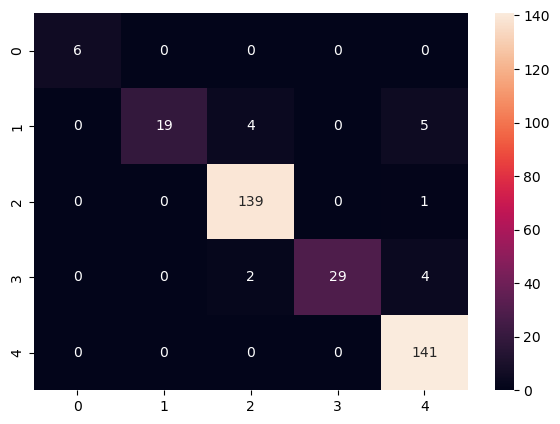

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
evaluate_model(rf,y_test)

## 5. Model hyperparameters tuning

In [31]:
from sklearn.model_selection import GridSearchCV

rf_grid = {'max_depth': [10, 20, 40, 50],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [20,50, 100]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf,param_grid=rf_grid,cv=5,n_jobs=-1,verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.935 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.921 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.903 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.889 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.921 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.921 

[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.921 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.911 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.893 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.914 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.903 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.893 total time=   0.1s
[CV 3/5] END max_depth=10, max_features=auto

[CV 2/5] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.882 total time=   0.4s[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.925 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.896 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.904 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.907 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=auto,

[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.921 total time=   0.3s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.943 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.932 total time=   0.7s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.914 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.921 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.925 total time=   0.1s
[CV 2/5] END max_depth=10, max_features=au

[CV 5/5] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.925 total time=   0.2s
[CV 3/5] END max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.921 total time=   0.6s
[CV 1/5] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.904 total time=   0.2s
[CV 4/5] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20;, score=0.921 total time=   0.2s
[CV 2/5] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50;, score=0.886 total time=   0.5s
[CV 5/5] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.928 total time=   0.8s
[CV 3/5] END max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.928 total time=   0.8s
[CV 1/5] END max_depth=50, max_features=auto

[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.928 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.921 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.896 total time=   0.1s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.914 total time=   0.3s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.914 total time=   0.6s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.886 total time=   0.6s
[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.935 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=auto,

[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   0.3s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.946 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.932 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.903 total time=   0.6s
[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.925 total time=   0.6s
[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.932 total time=   0.3s
[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.886 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=au

[CV 3/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.921 total time=   0.9s
[CV 1/5] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.925 total time=   1.0s
[CV 4/5] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.961 total time=   0.5s
[CV 3/5] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=20;, score=0.918 total time=   0.2s
[CV 1/5] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.907 total time=   0.4s
[CV 4/5] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.928 total time=   0.8s
[CV 2/5] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.889 total time=   0.8s
[CV 5/5] END max_depth=40, max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 100]},
             verbose=3)

In [32]:
rf_best = grid_search.best_estimator_
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

Accuracy: 0.9542857142857143


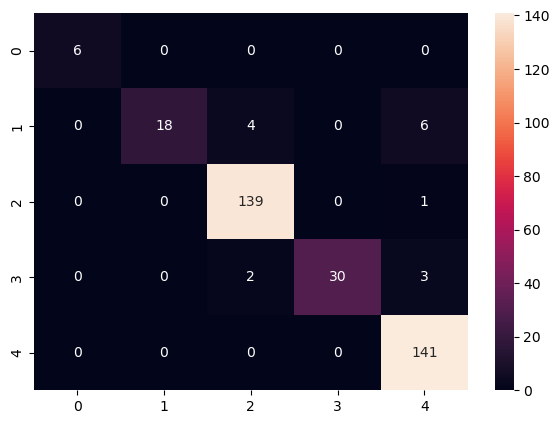

[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.939 total time=   0.4s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.914 total time=   0.1s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.918 total time=   0.4s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.939 total time=   0.8s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.943 total time=   0.8s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.925 total time=   0.7s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50;, score=0.939 total time=   0.4s
[CV 2/5] END max_depth=50, max_features=s

[CV 5/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50;, score=0.935 total time=   0.3s
[CV 3/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=20;, score=0.910 total time=   0.1s
[CV 1/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.911 total time=   0.3s
[CV 4/5] END max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.921 total time=   0.7s
[CV 2/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.925 total time=   0.8s
[CV 5/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.946 total time=   0.3s
[CV 3/5] END max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=20;, score=0.910 total time=   0.1s
[CV 2/5] END max_depth=40, max_features=sq

[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.929 total time=   0.1s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=20;, score=0.950 total time=   0.2s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.932 total time=   0.4s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.953 total time=   0.8s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.935 total time=   0.8s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100;, score=0.886 total time=   0.8s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.953 total time=   0.4s
[CV 3/5] END max_depth=50, max_features=sqrt

[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.928 total time=   0.1s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.939 total time=   0.1s
[CV 4/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.925 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.932 total time=   0.7s
[CV 2/5] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.900 total time=   0.7s
[CV 3/5] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.910 total time=   0.7s
[CV 5/5] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50;, score=0.925 total time=   0.3s
[CV 1/5] END max_depth=10, max_features=sqr

[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=20;, score=0.921 total time=   0.2s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50;, score=0.925 total time=   0.4s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.904 total time=   0.8s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50;, score=0.943 total time=   0.4s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.950 total time=   0.1s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.904 total time=   0.4s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.953 total time=   0.8s
[CV 3/5] END max_depth=50, max_features=sqrt,

[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.907 total time=   0.2s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.957 total time=   0.2s
[CV 3/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50;, score=0.935 total time=   0.4s
[CV 1/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.918 total time=   0.2s
[CV 4/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=20;, score=0.943 total time=   0.2s
[CV 2/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=0.904 total time=   0.4s
[CV 5/5] END max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.946 total time=   0.7s
[CV 3/5] END max_depth=50, max_features=sqrt, m

In [33]:
evaluate_model(rf_best,y_test)